# 가설: K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

 - e:추정지, p:잠정치, -:자료없음, ...:미상자료, x: 비밀번호

# 필요 라이브러리 가져오기

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [115]:
# 시각화 위한 폰트 설정
import os

if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

In [116]:
# 레티나 설정을 하면 글씨가 좀 더 선명하게 보인ㄷ.
# 폰트의 주변이 흐릿하게 보이는 것을 방지한다.
%config InlineBackend.figure_format = 'retina'

# 데이터 로드하기

In [117]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221122201127.csv", encoding="cp949")

In [118]:
df_raw.head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,749612,858240,833672,897205,921586,974060,1251122,1345723,1526135,1881628
1,합계,합계,면세점,-,-,-,-,-,-,-,...,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,138982,180356,168059,171886,159750,203404,180429,188565,189763,225993
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,2018,2158,5236,3854,4320,4511,3702,4038,3670,3827
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,5,1,2,6,1,215,2,0,1,70


In [119]:
df_raw.shape

(450, 27)

In [120]:
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [121]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"]== "미국"]

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1383
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1787
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1738
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


# 분산과 시각화를 위한 tidy data 만들기

In [122]:
# 컬럼에 있는 데이터를 행으로?
df_raw.melt?

In [123]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [124]:
df=df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"],var_name="기간", value_name="백만원")
# id_vars:어떤 컬럼이 기준이 되는지? 여러개하려면 리스트 형태로
# variable : 나머지 컬럼값들.. 2014~ var_name 통해서 이름 바꿔줄수 있다. 
# value : df_raw.values에 들어가있던 값들이 다 value로 들어가 있따.

In [125]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [126]:
df.shape
# 기간이 다 행으로 와서 행이 늘어났다.

(10800, 5)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


# 데이터 전처리
## 기간에서 연도를 분리하기

In [128]:
df["기간"]
# object : string데이터를 의미

0        2014.1/4
1        2014.1/4
2        2014.1/4
3        2014.1/4
4        2014.1/4
           ...   
10795    2019.4/4
10796    2019.4/4
10797    2019.4/4
10798    2019.4/4
10799    2019.4/4
Name: 기간, Length: 10800, dtype: object

df["기간"].map?

In [129]:

df["연도"] = list(map(lambda x : int(x.split(".")[0]), df["기간"])) 

In [130]:
# 기간에서 분기만 분리하기
df["분기"] = list(map(lambda x : int(x.split(".")[1].split()[0].split("/")[0]), df["기간"])) 

In [131]:
# (1) "." 을 기준으로 split하고 (["2022", "1/4 p"]) 1번째 인덱스를 취함 -> "1/4 p"

# (2) " " 을 기준으로 split하고 (["1/4", "p"]) 0번째 인덱스를 취함 -> "1/4"

# (3) "/"을 기준으로 split하고 (["1", "4"]) 0번째 인덱스를 취함

# (4) "1"에 int() 형변환 함수를 씌워 int64형으로 변환



In [132]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


## 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [133]:
# - 문자를 결측치로 변경하고 float타입으로 변경하기
df["백만원"] = df["백만원"].replace("-",pd.np.nan).astype(float)
df["백만원"]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_117660\99655999.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df["백만원"] = df["백만원"].replace("-",pd.np.nan).astype(float)


0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
10795         0.0
10796       531.0
10797      1094.0
10798         1.0
10799      1093.0
Name: 백만원, Length: 10800, dtype: float64

In [134]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


## 필요없는 데이터 제거하기

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [136]:
# 합계 데이터는 따로 구할 수 있으므로 전체 데이터에서 제거한다.

df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [137]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화
## 전체 상품군 판매액

In [138]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지
# 평균값을 구하는 그래프에서 올바른 값을 표현할 수 있다.

df_total=df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

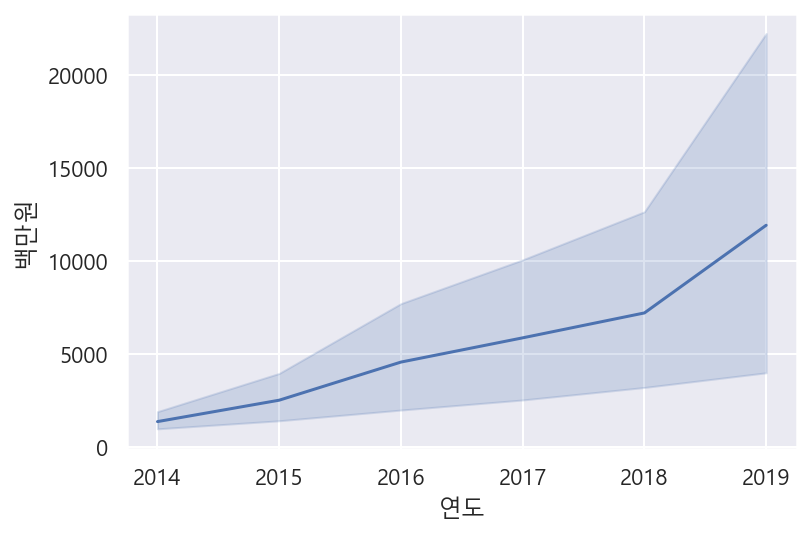

In [139]:
# 연도, 판매액 lineplot으로 그리기

sns.lineplot(data=df_total, x="연도", y="백만원")

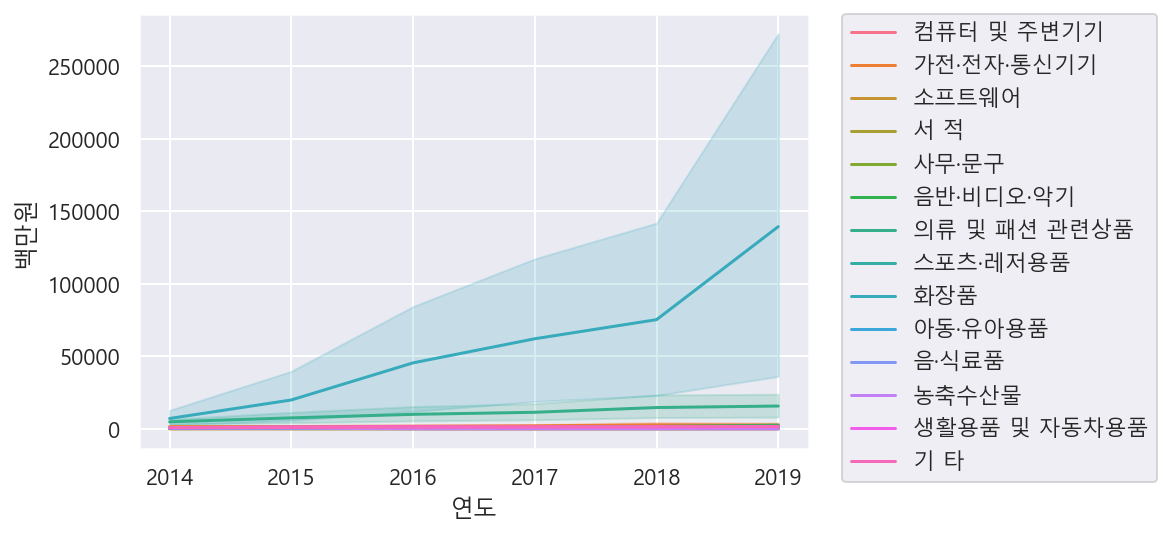

In [140]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# 오른쪽으로 범례 옮기는거 

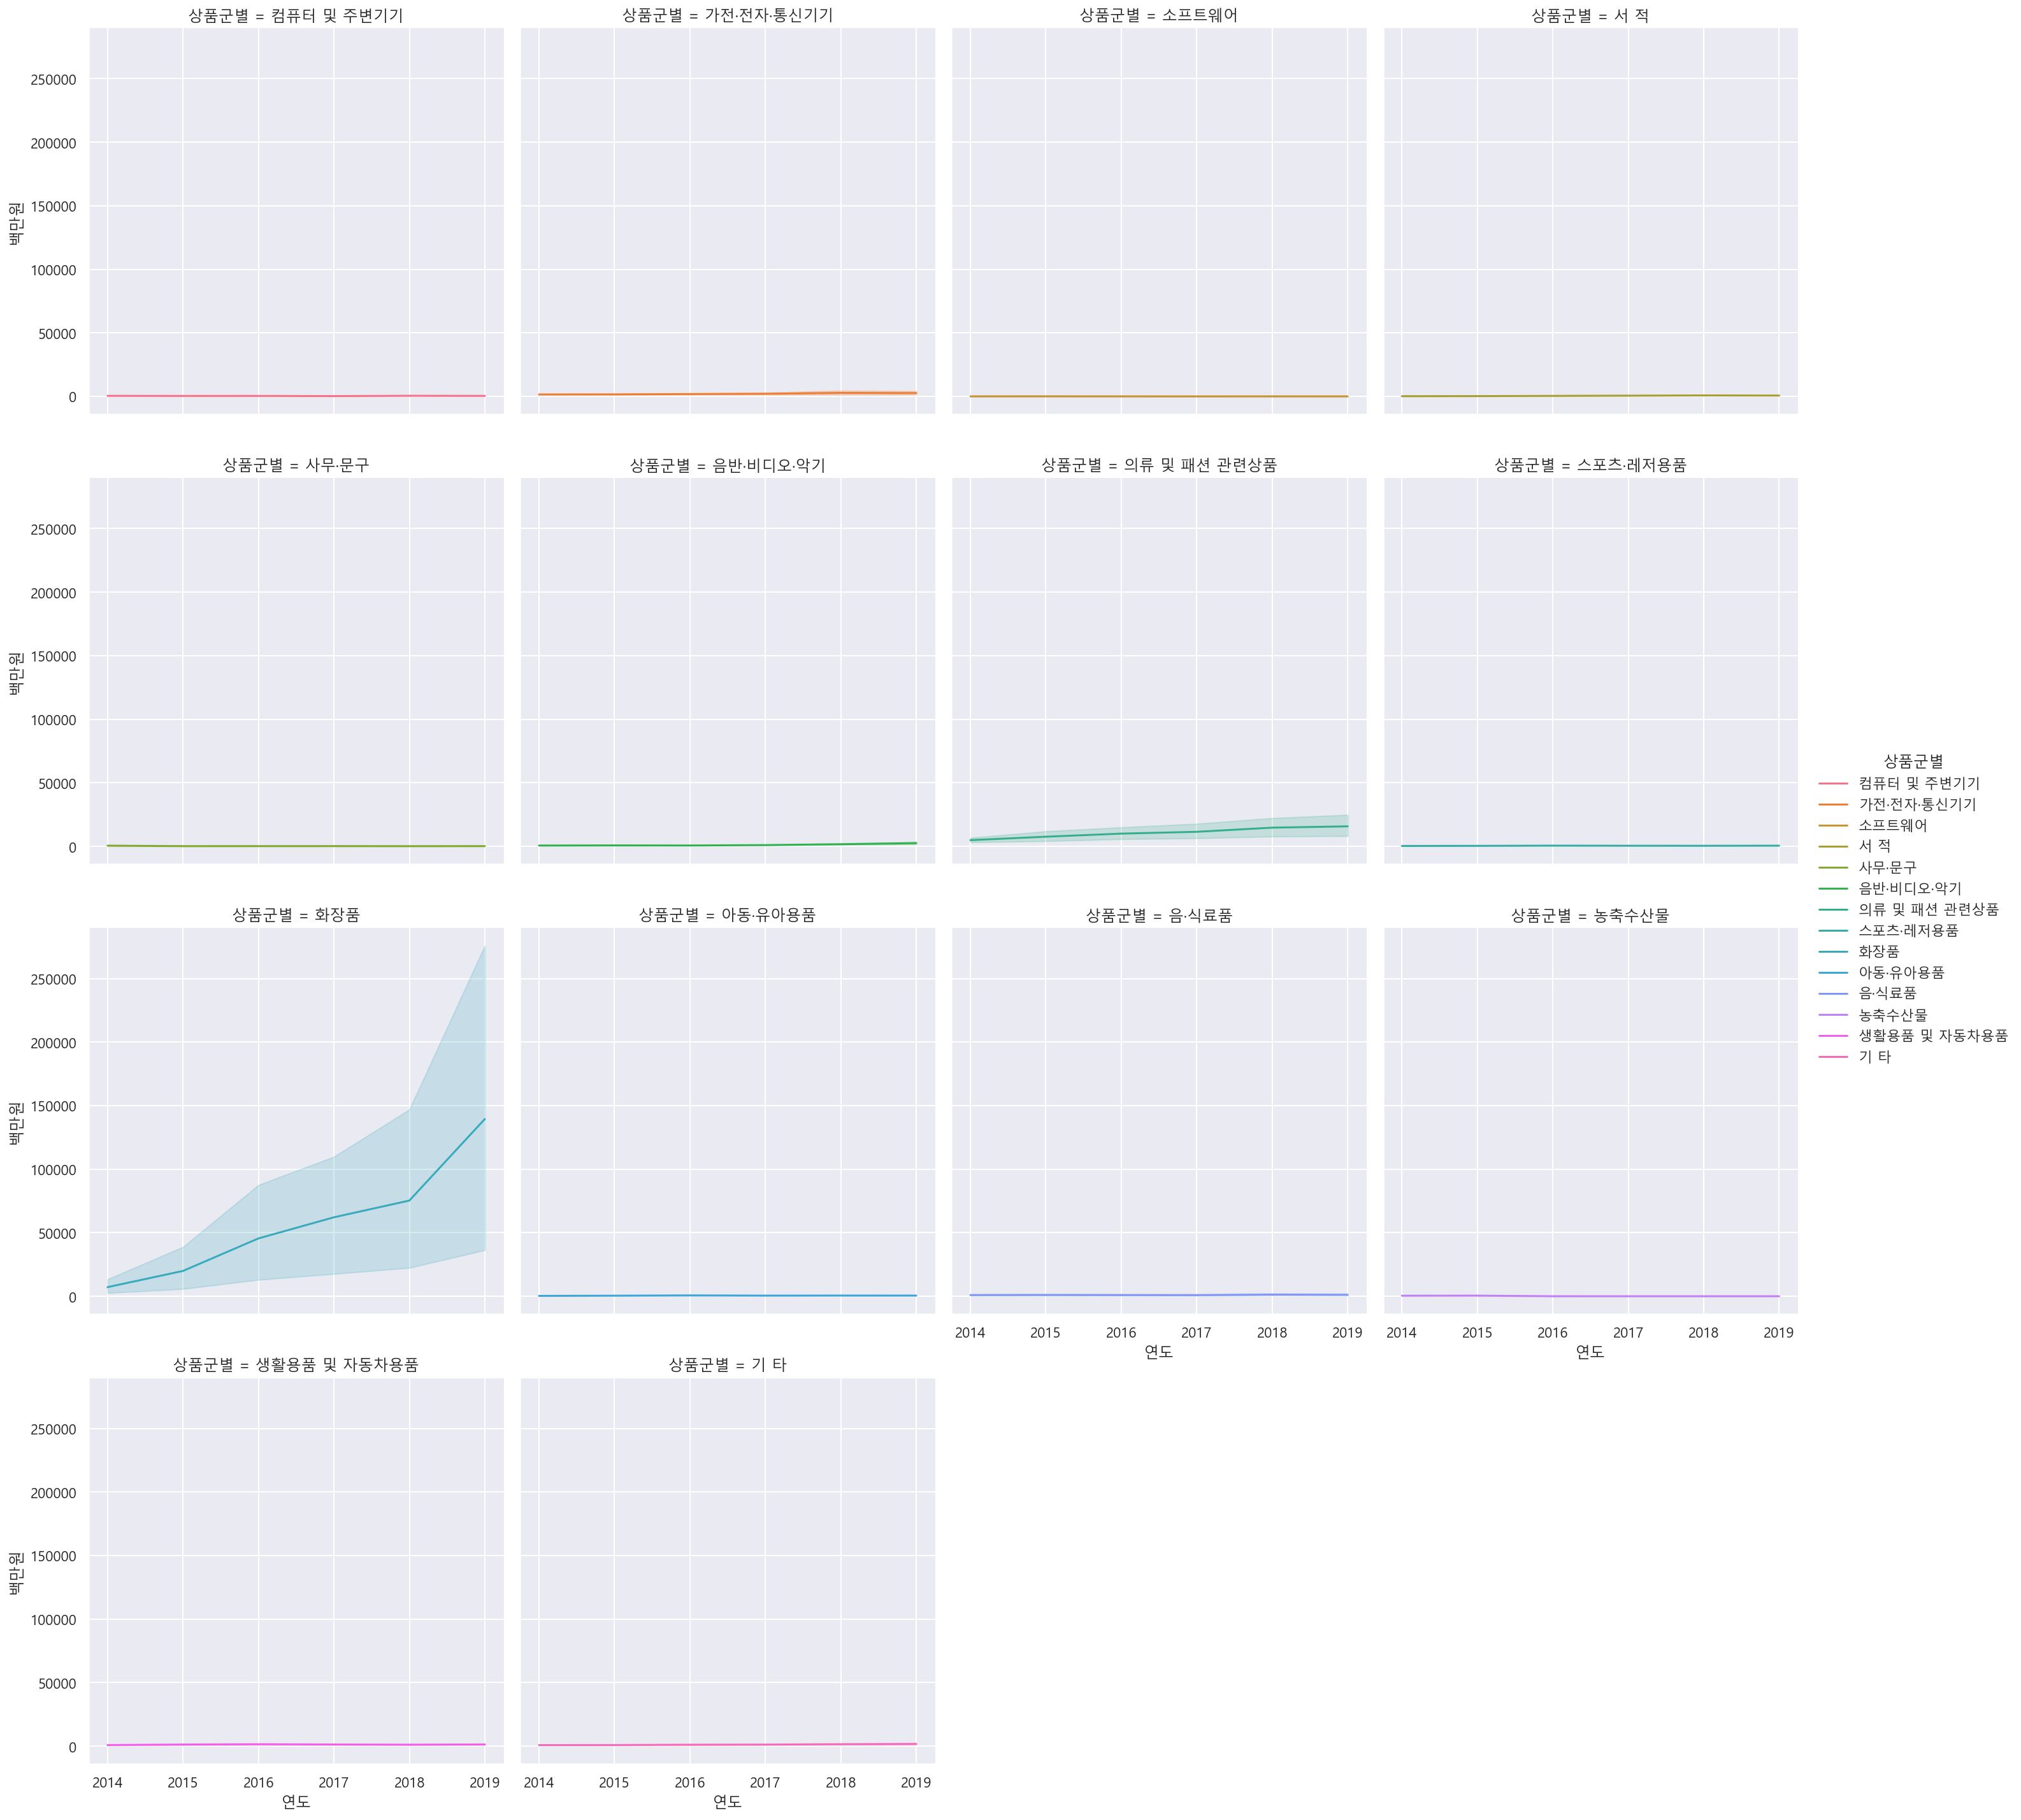

In [141]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [142]:
# isin을 사용해 화장품만 제외하고 df_sb이라는 변수에 담기

df_sub=df_total[~df_total["상품군별"].isin(["화장품","의류 및 패션 관련상품"])].copy()

# 앞에 ~ 물결 표시해ㅜㅈ면 화장품만 빼고...

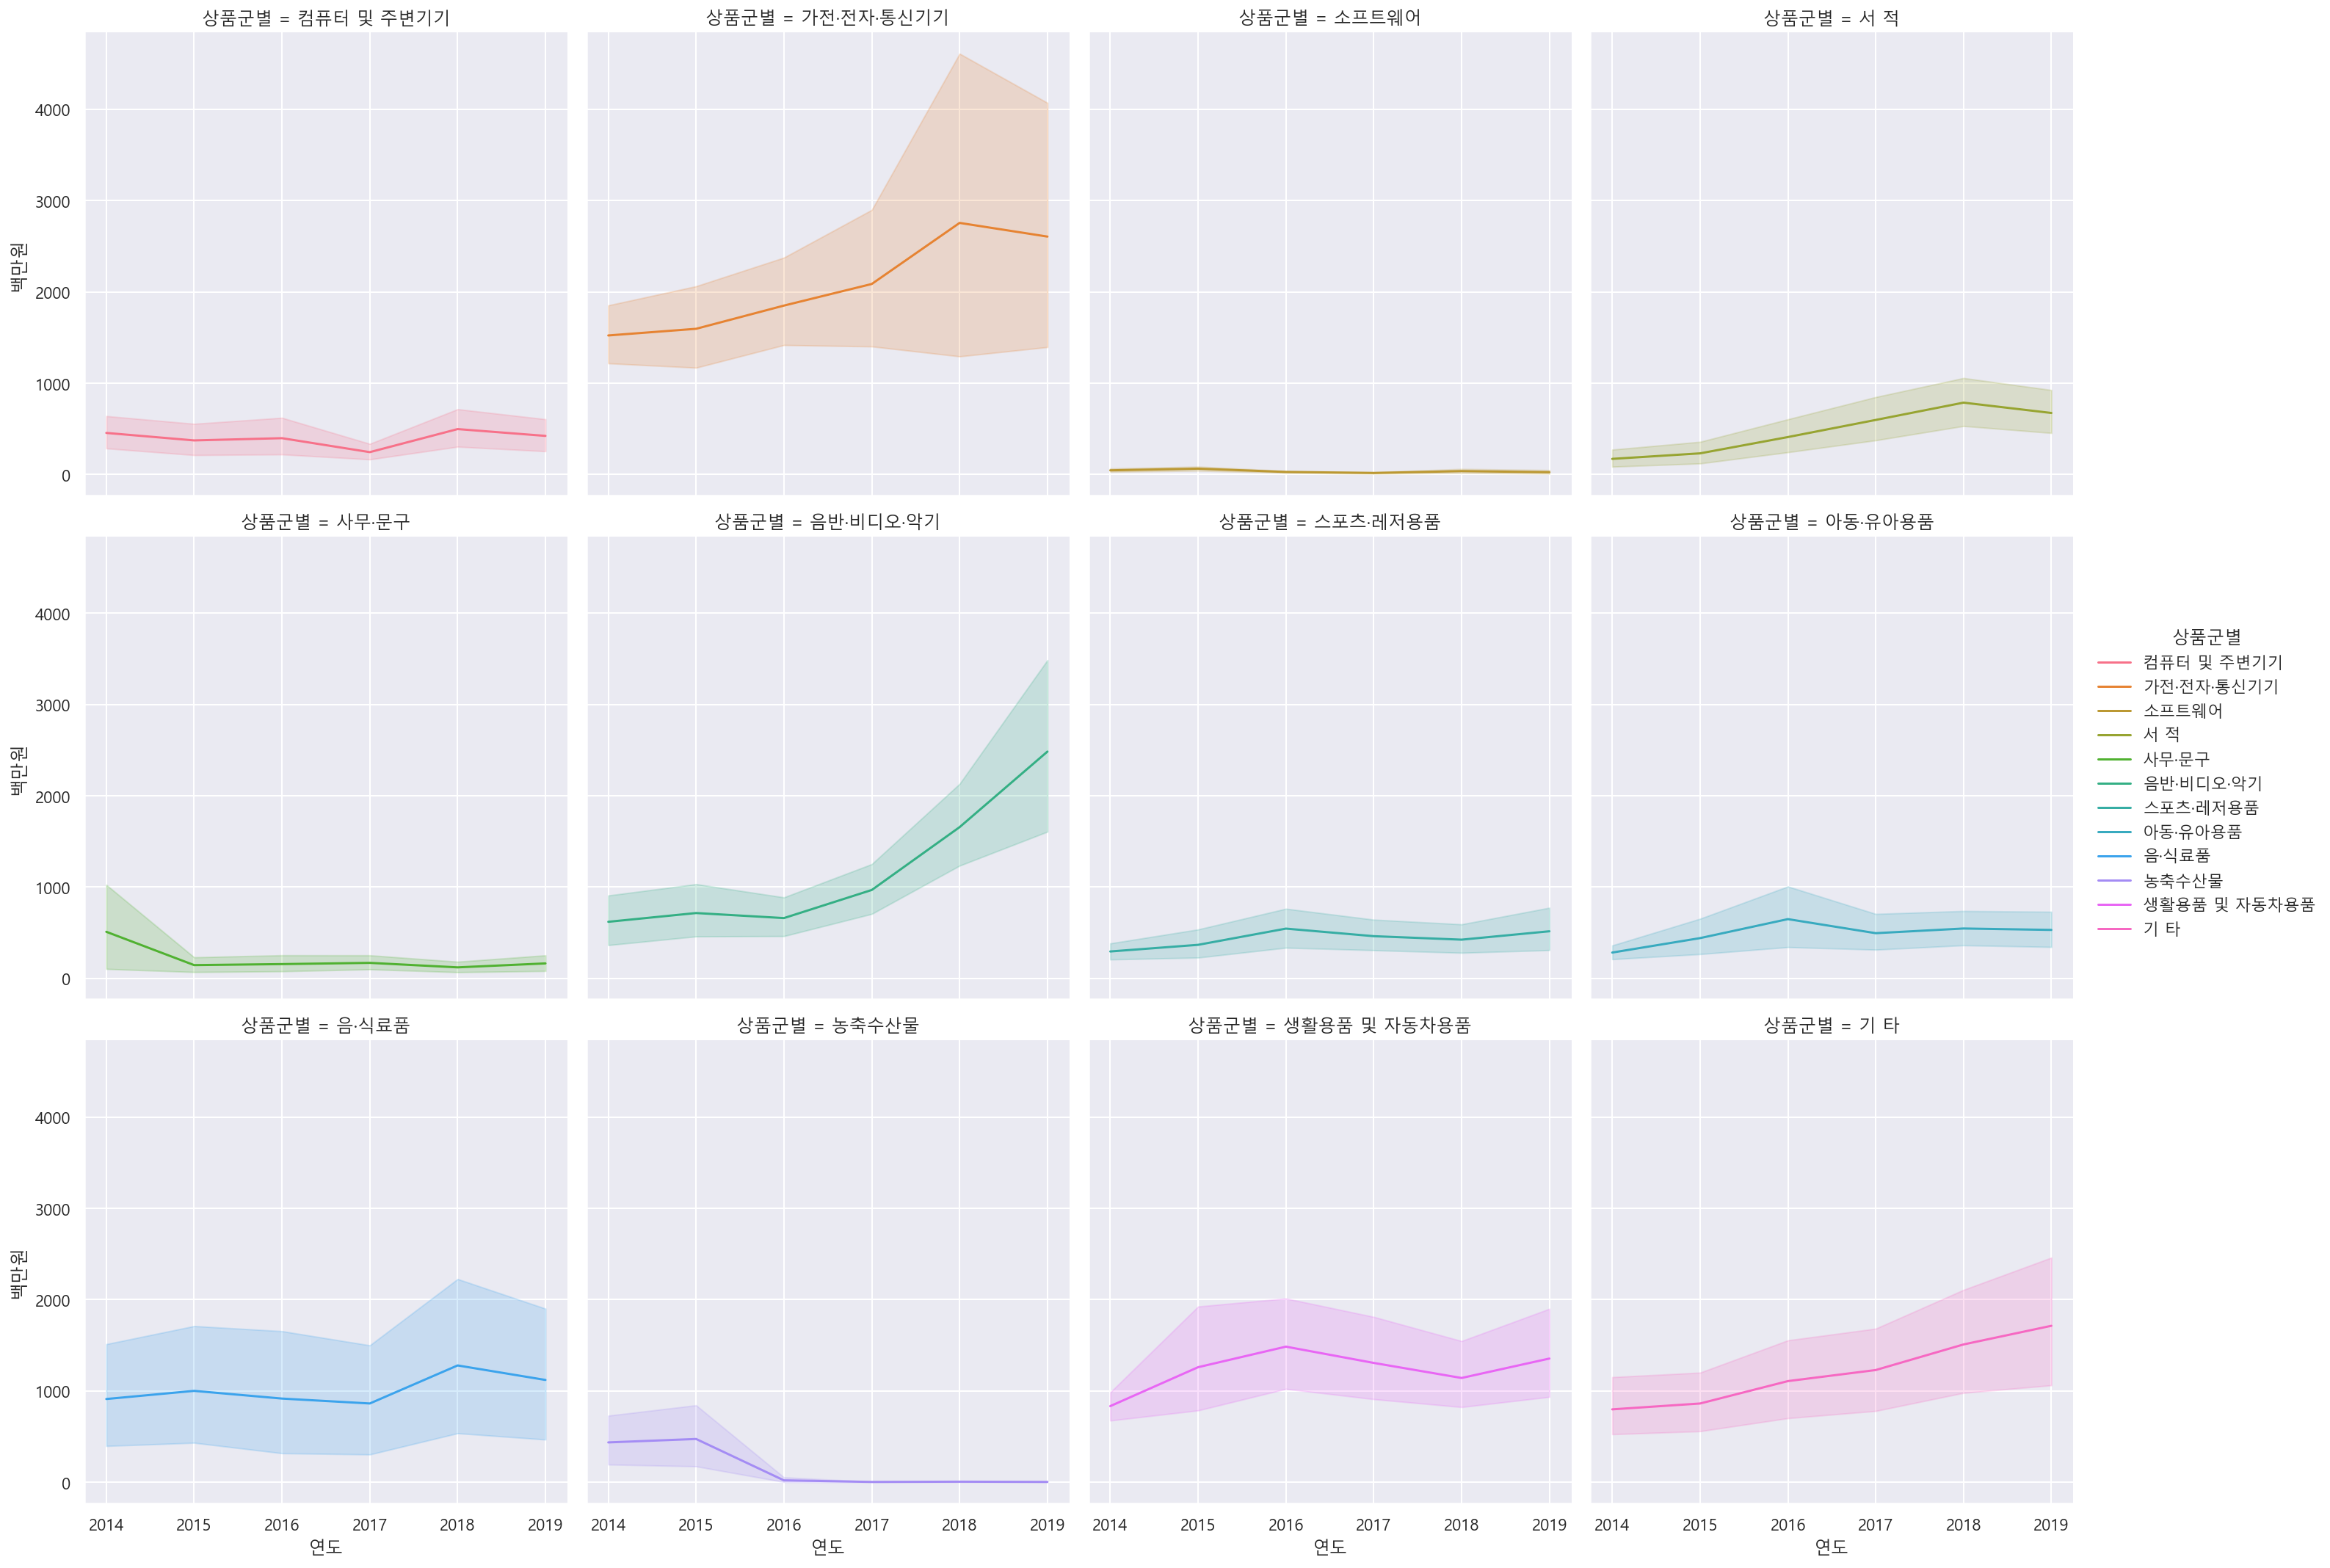

In [143]:
# 연도별 판매액을 상품군별로 relplot을 활용해 서브플롯으로 그려보기

sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")
#kind기본값은 scatter

## 화장품의 온라인 쇼핑 해외직접판매액

In [144]:
# df_cosmetic이라는 변수에 상품군별이 화장품인 데이터만 가져오기

df_cosmetic = df_total[df_total["상품군별"]=="화장품"].copy()
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014.1/4,3740.0,2014,1
117,중국,화장품,계,2014.1/4,32235.0,2014,1
162,일본,화장품,계,2014.1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014.1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014.1/4,937.0,2014,1


In [145]:
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

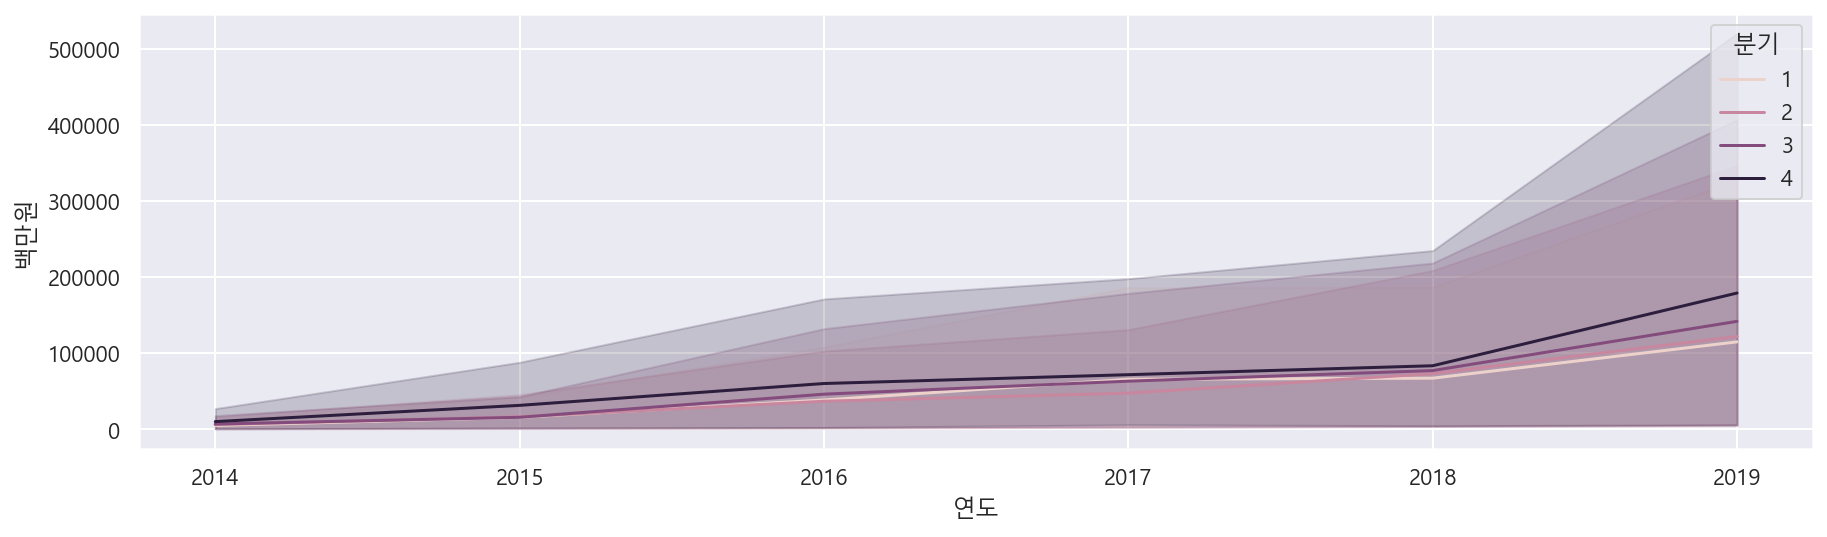

In [146]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현해 보기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

In [147]:
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014.1/4,3740.0,2014,1
117,중국,화장품,계,2014.1/4,32235.0,2014,1
162,일본,화장품,계,2014.1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014.1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014.1/4,937.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

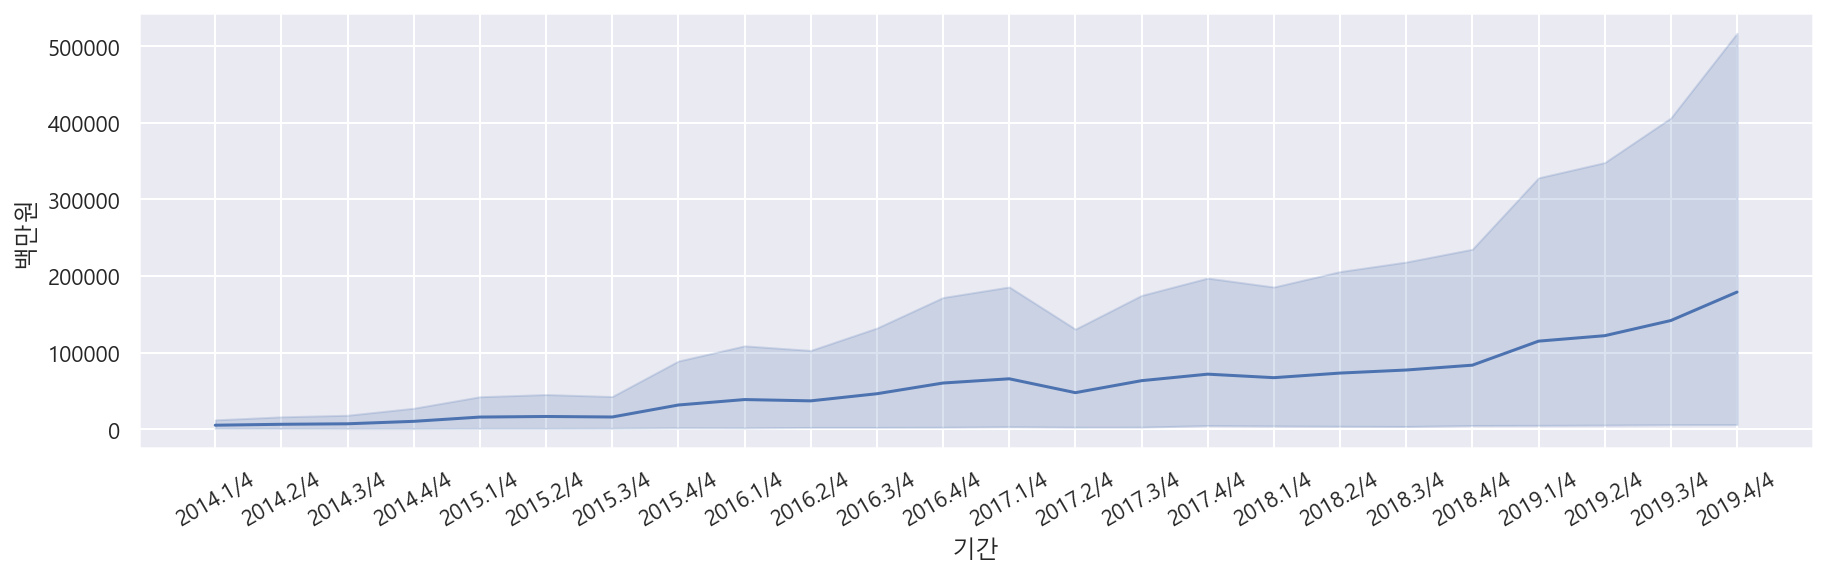

In [148]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30) #x축 기울기
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

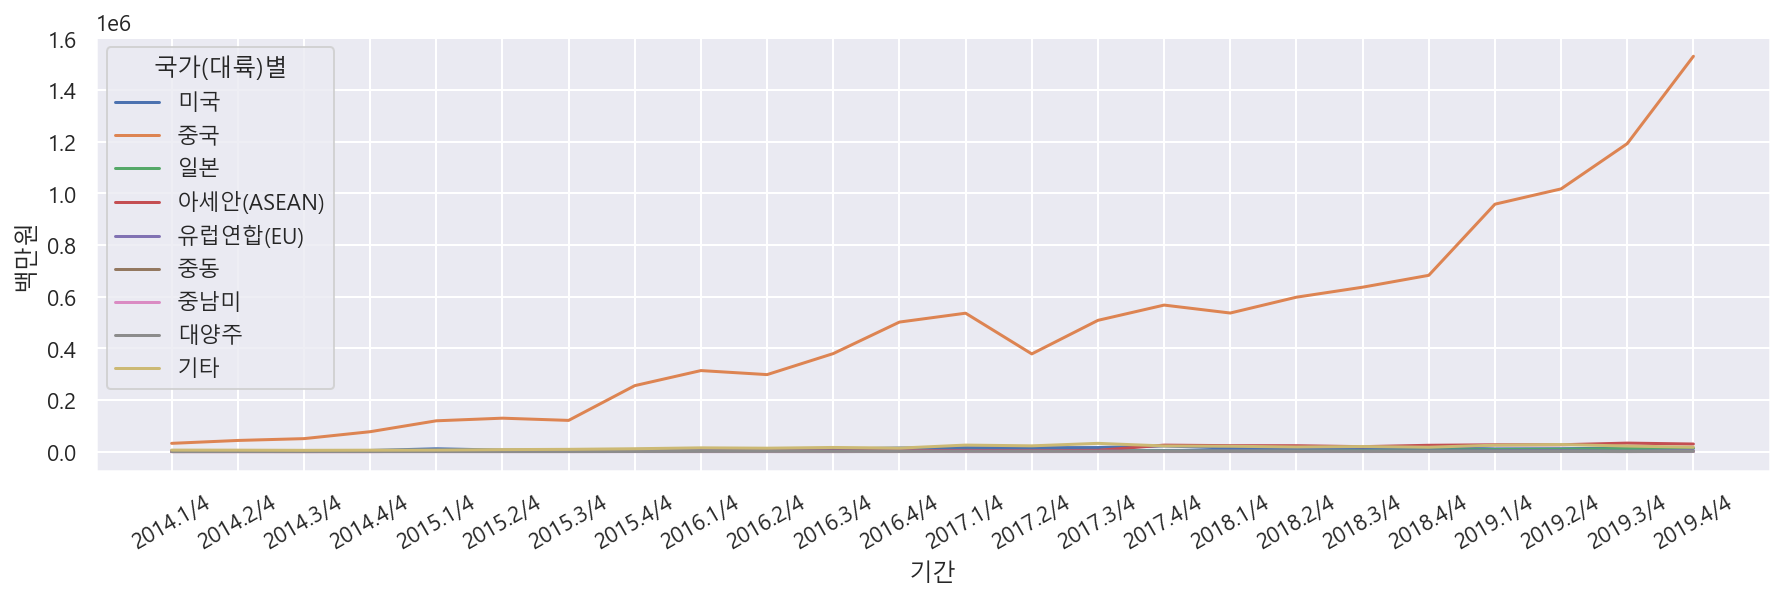

In [149]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30) #x축 기울기
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

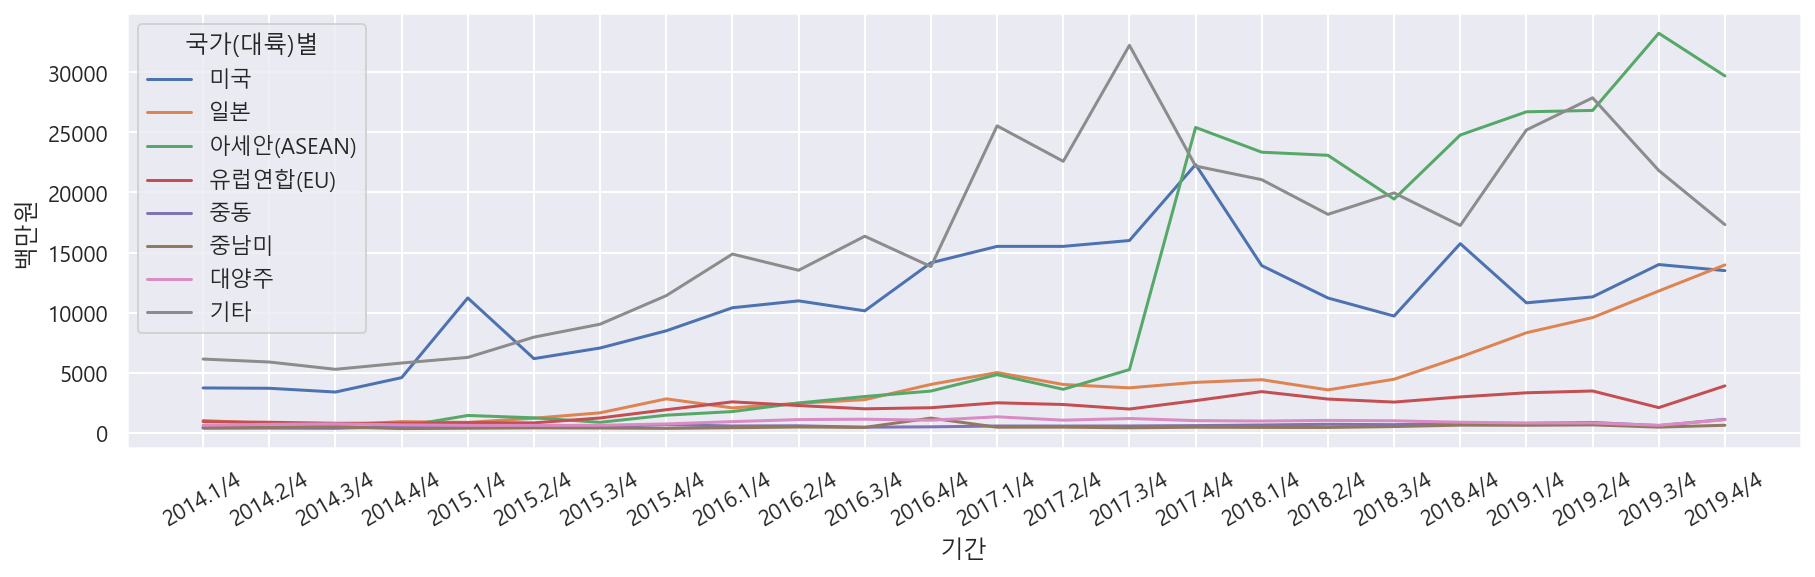

In [150]:
# 중국빼고 보기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30) #x축 기울기
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"]!="중국"], x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

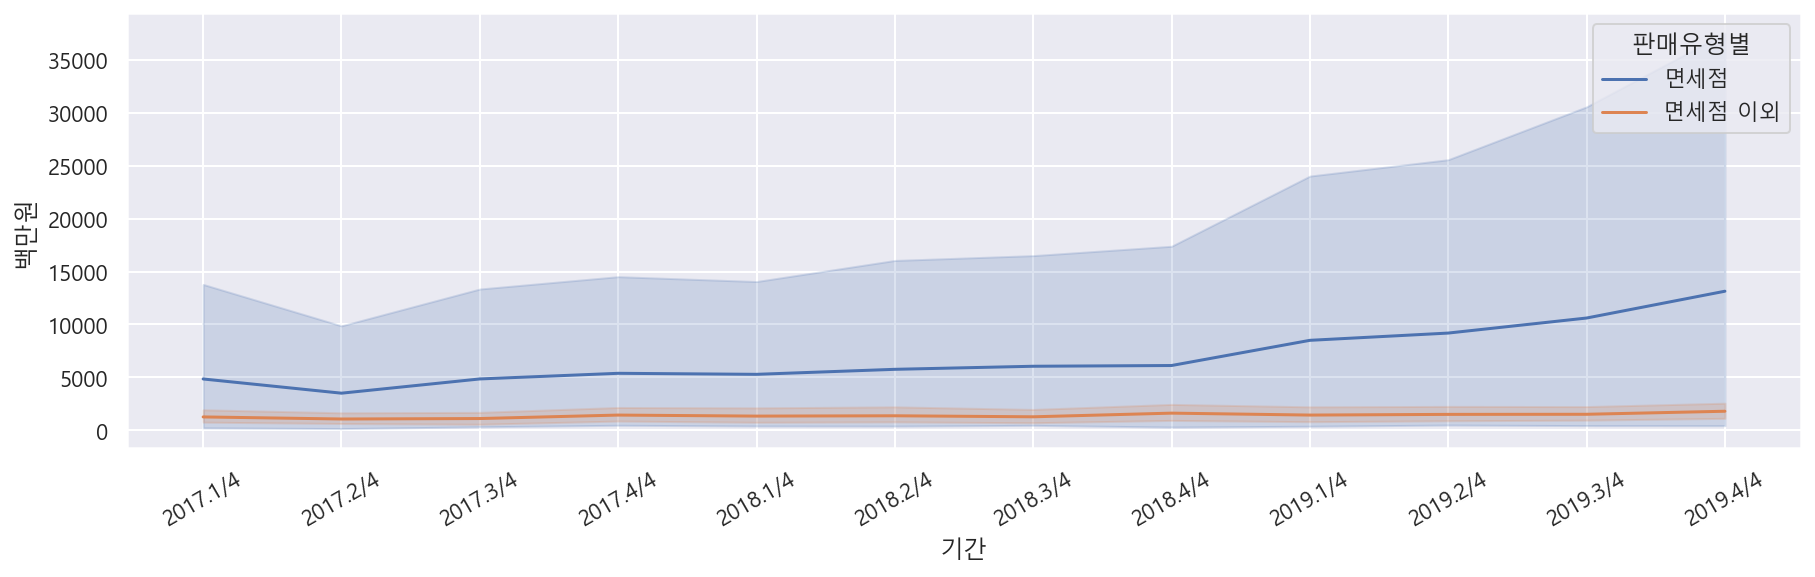

In [155]:
# 화장품 판매액에 대한 기간별 금액 데이터를 시각화하고 "판매유형별"로 다른색상으로 표현하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30) #x축 기울기
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

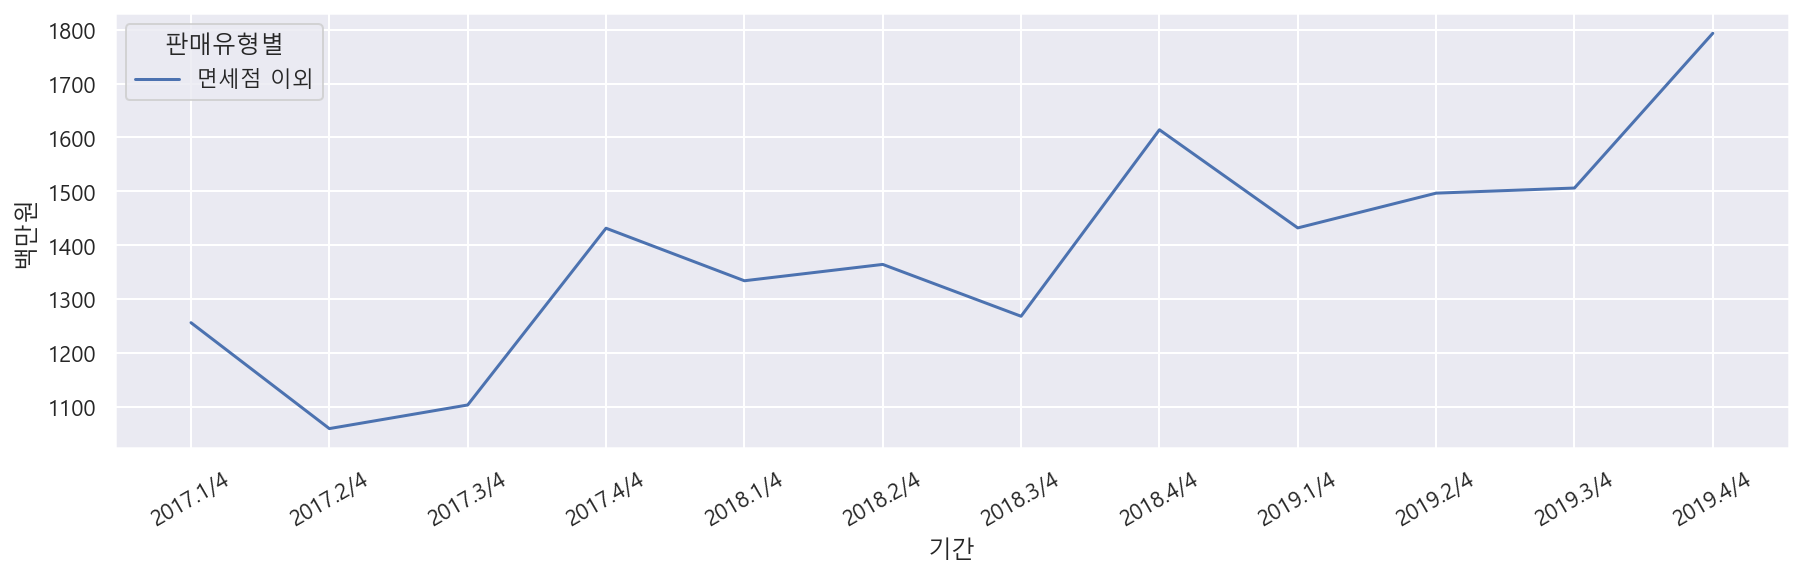

In [158]:
# 화장품 판매액에 대한 기간별 금액 데이터를 시각화하고 "판매유형별"로 다른색상으로 표현하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30) #x축 기울기
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"]!="면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

## 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [168]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아두기


df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"]=="계")].copy()
df_fashion.head()


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

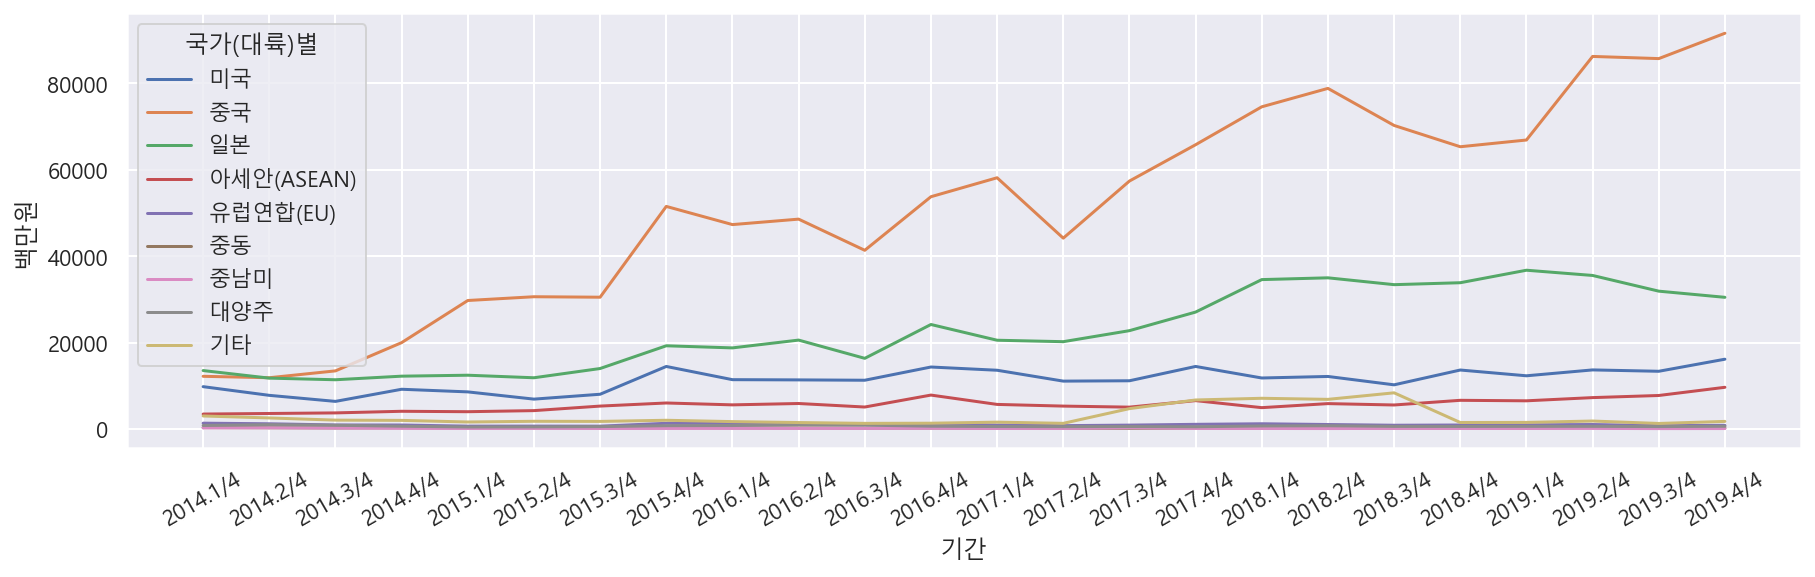

In [170]:
# 의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터를 시각화하고
# 국가별로 다른색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30) #x축 기울기
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

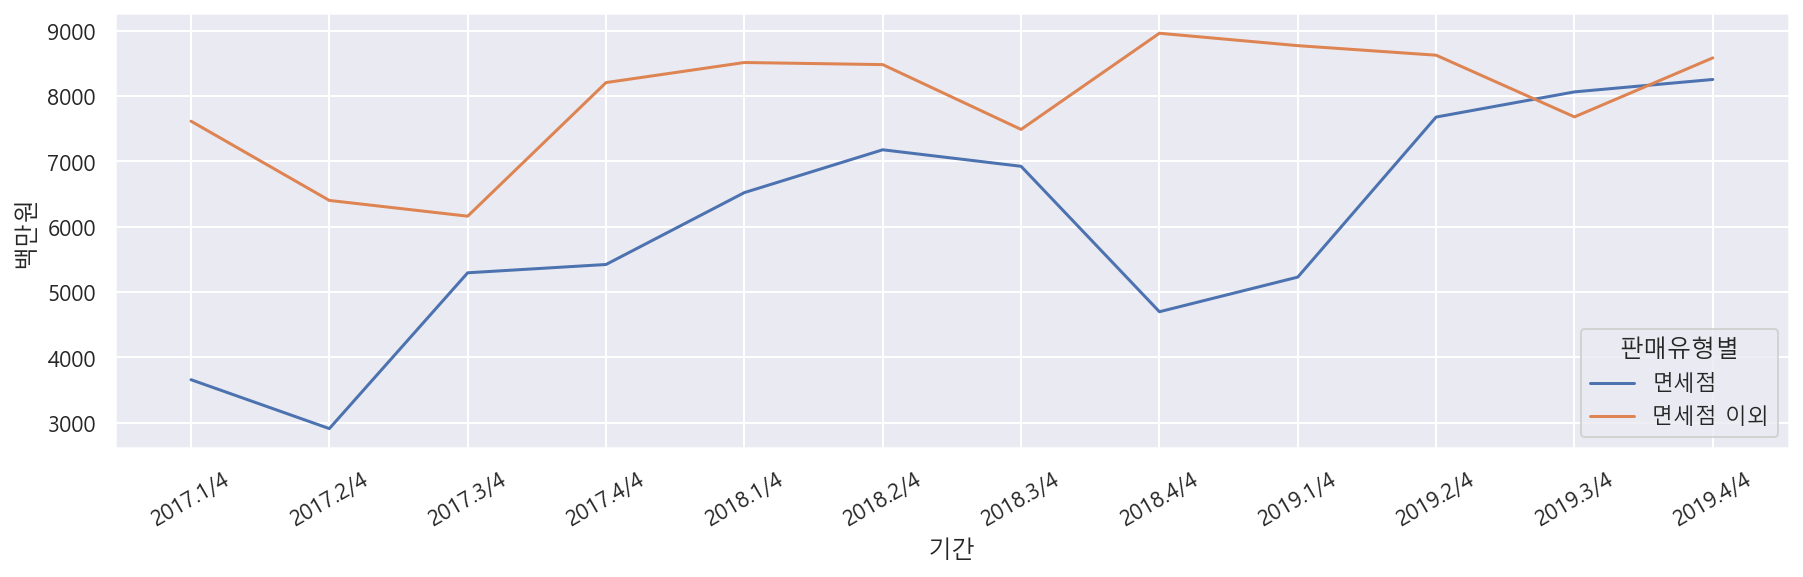

In [175]:
# 의류 및 패션관련 상품 판매엑에 대한 기간별 금액 데이터 시각화
# 판매유형별로 다른 색상 표시

df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

## 데이터 집계하기

In [178]:
# 피봇테이블로 "국가(대륙)별", "연도"별로 합계 금액을 표 형ㅇ태로 구하기

df_fashion.pivot_table?

In [ ]:
df_fashion["판매유형별"].value_counts()

In [182]:
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


In [184]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
# 기본은 평균으로 되어있음.. aggfunc

result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


## 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

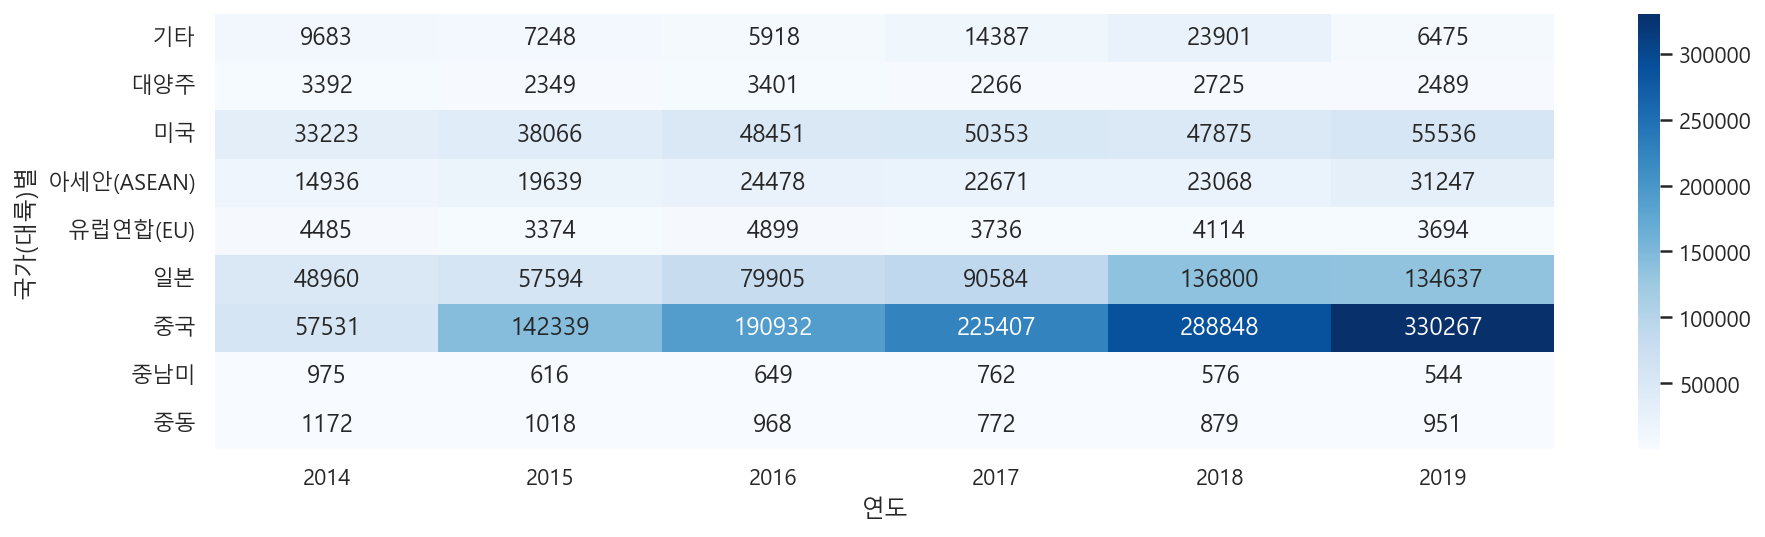

In [192]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현

plt.figure(figsize=(15,4)
sns.heatmap(result, cmap="Blues", annot= True, fmt=".0f")
# annot=true 숫자값 표시 

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

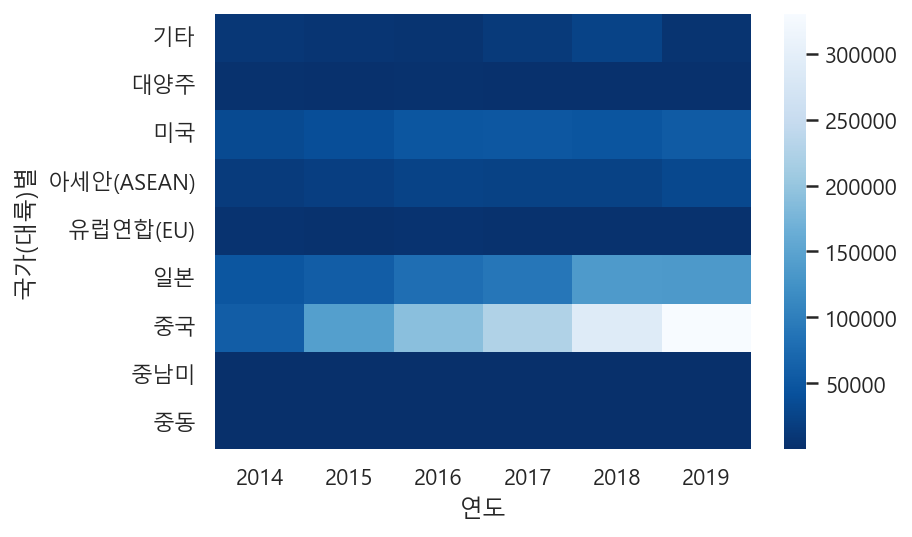

In [188]:
sns.heatmap(result, cmap="Blues_r")
# _r 하면 위에랑 반대로.. 


# 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

In [193]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019.4/4,193.0,2019,4
10788,기타,음·식료품,계,2019.4/4,319.0,2019,4
10791,기타,농축수산물,계,2019.4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019.4/4,531.0,2019,4


<AxesSubplot:xlabel='연도', ylabel='백만원'>

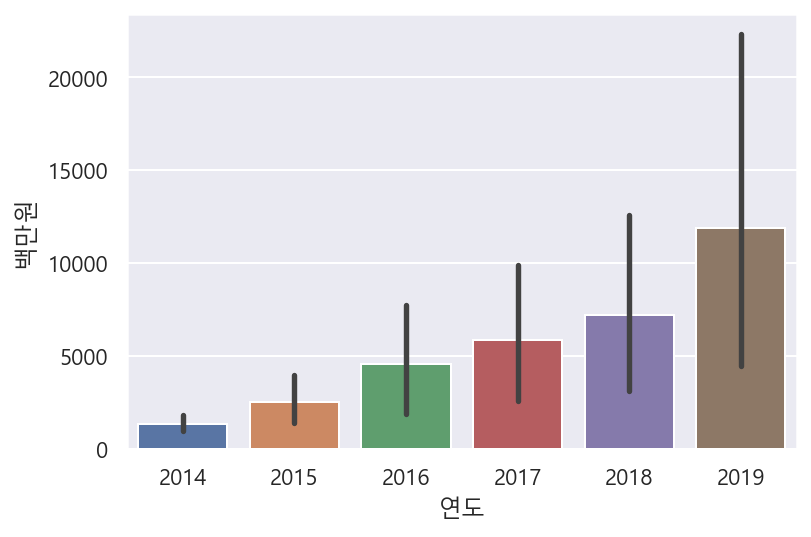

In [196]:
sns.barplot(data=df_total, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

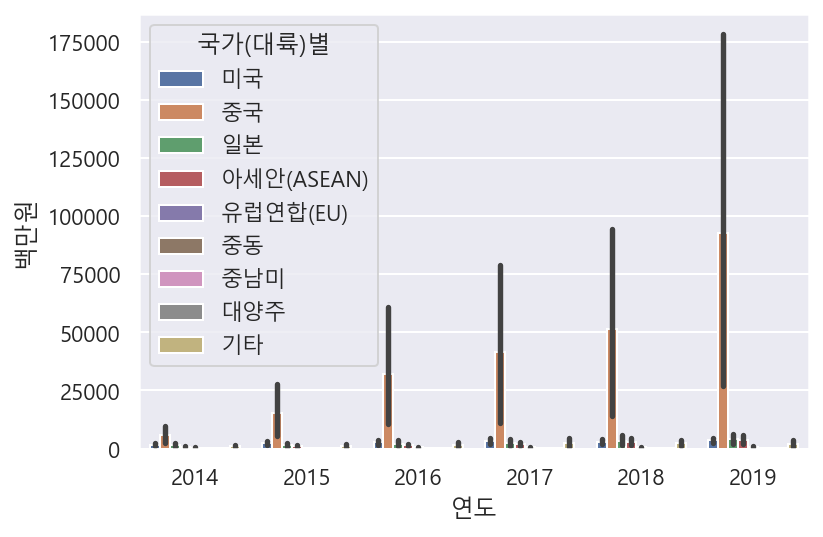

In [199]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기

sns.barplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

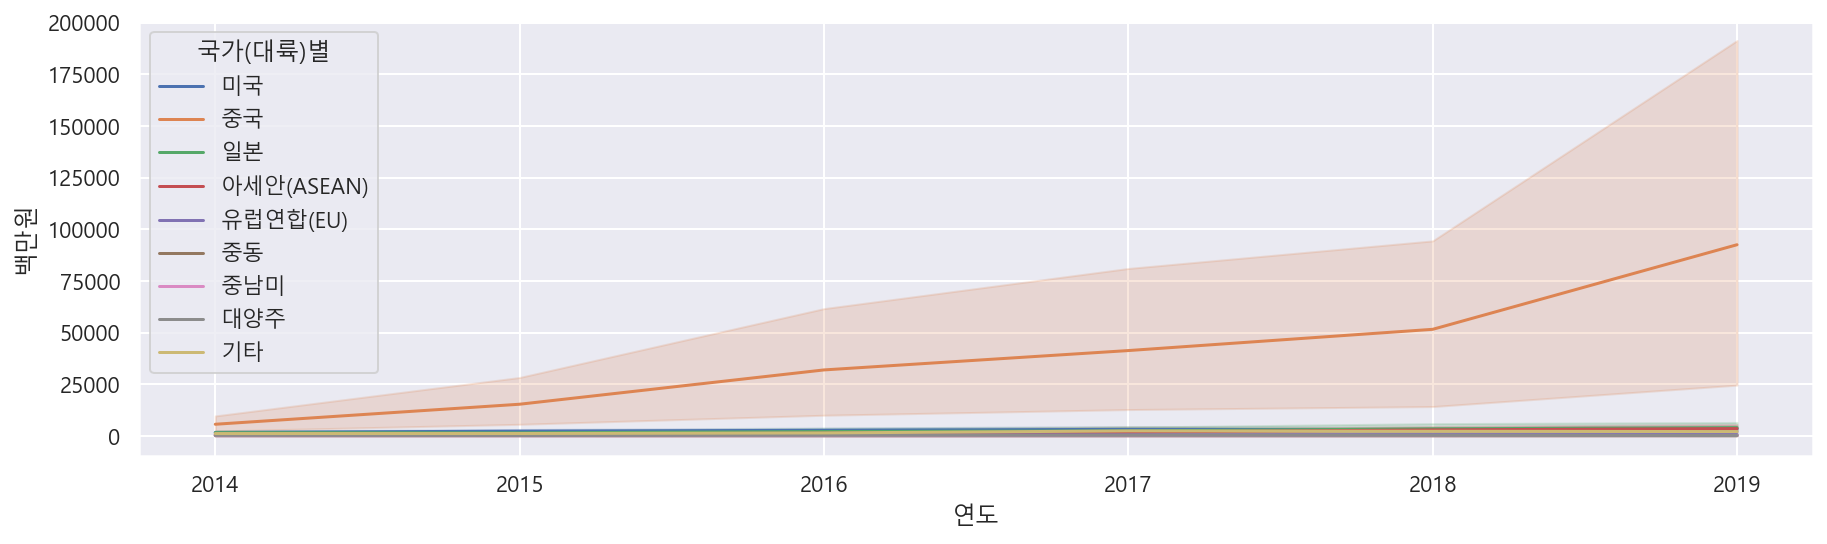

In [200]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

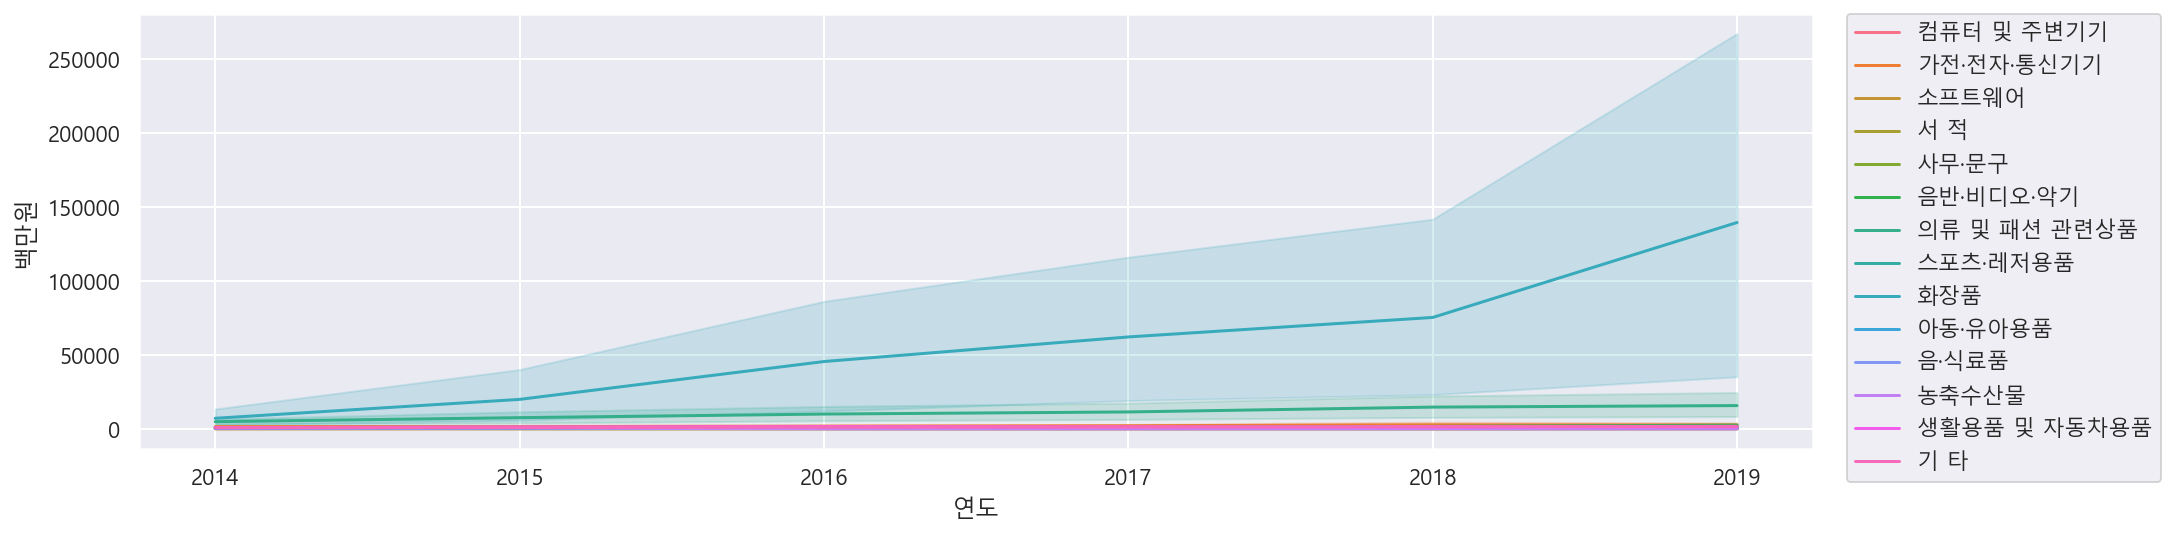

In [203]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기

plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)